# This project about buiding machine learning models for a data set of customers applying for loan in a bank. The aim is to predict if the bank should approve the loan for a partcular customer or not.

# Preparing train data

In [1]:
# importing packages that we will need through out this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading test data into pandas data frame and droping some unnecessary coloumns
loan=pd.read_excel("Project - 4 - Train Data.xlsx")
loan=loan.drop(['Loanapp_ID','first_name','last_name','email','address','INT_ID','Prev_ID','AGT_ID'],axis=1)
loan.head()

,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status
0,M,N,0,Grad,N,7018.8,0.0,NaN,360.0,1.0,Urban,Y
1,M,Y,1,Grad,N,5499.6,1809.6,153.6,360.0,1.0,Rural,N
2,M,Y,0,Grad,Y,3600.0,0.0,79.2,360.0,1.0,Urban,Y
3,M,Y,0,Non Grad,N,3099.6,2829.6,144.0,360.0,1.0,Urban,Y
4,M,N,0,Grad,N,7200.0,0.0,169.2,360.0,1.0,Urban,Y


In [3]:
# Lets see the info. of the data frame 
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             601 non-null    object 
 1   Marital_Status  611 non-null    object 
 2   Dependents      599 non-null    object 
 3   Qual_var        614 non-null    object 
 4   SE              582 non-null    object 
 5   App_Income_1    614 non-null    float64
 6   App_Income_2    614 non-null    float64
 7   CPL_Amount      612 non-null    float64
 8   CPL_Term        600 non-null    float64
 9   Credit_His      564 non-null    float64
 10  Prop_Area       614 non-null    object 
 11  CPL_Status      614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


In [4]:
# chacking if there is any missing values
loan.isnull().values.sum()

129

In [5]:
loan['Sex'].value_counts()

M    489
F    112
Name: Sex, dtype: int64

In [6]:
loan['Marital_Status'].value_counts()

Y    398
N    213
Name: Marital_Status, dtype: int64

In [7]:
loan['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [8]:
loan['Qual_var'].value_counts()

Grad        480
Non Grad    134
Name: Qual_var, dtype: int64

In [9]:
loan['SE'].value_counts()

N    500
Y     82
Name: SE, dtype: int64

In [10]:
loan['Prop_Area'].value_counts()

Semi U    233
Urban     202
Rural     179
Name: Prop_Area, dtype: int64

In [11]:
loan['CPL_Status'].value_counts()

Y    422
N    192
Name: CPL_Status, dtype: int64

In [12]:
loan.isnull().sum()

Sex               13
Marital_Status     3
Dependents        15
Qual_var           0
SE                32
App_Income_1       0
App_Income_2       0
CPL_Amount         2
CPL_Term          14
Credit_His        50
Prop_Area          0
CPL_Status         0
dtype: int64

Here we can see that there are still some missing values in the data set

In [13]:
loan.isnull().sum().sum()

129

In [14]:
# filling the missing values by mean values for continuous data
loan.CPL_Amount.fillna(loan['CPL_Amount'].mean(),inplace=True)
loan.CPL_Term.fillna(loan['CPL_Term'].mean(),inplace=True)
loan.Credit_His.fillna(loan['Credit_His'].mean(),inplace=True)
loan.isnull().sum()

Sex               13
Marital_Status     3
Dependents        15
Qual_var           0
SE                32
App_Income_1       0
App_Income_2       0
CPL_Amount         0
CPL_Term           0
Credit_His         0
Prop_Area          0
CPL_Status         0
dtype: int64

In [15]:
# check the info of data set
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             601 non-null    object 
 1   Marital_Status  611 non-null    object 
 2   Dependents      599 non-null    object 
 3   Qual_var        614 non-null    object 
 4   SE              582 non-null    object 
 5   App_Income_1    614 non-null    float64
 6   App_Income_2    614 non-null    float64
 7   CPL_Amount      614 non-null    float64
 8   CPL_Term        614 non-null    float64
 9   Credit_His      614 non-null    float64
 10  Prop_Area       614 non-null    object 
 11  CPL_Status      614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


In [16]:
# mapping catagorical values to numerical values
loan['Sex']=loan.Sex.map({'M':1,'F':0})
loan['Marital_Status']=loan.Marital_Status.map({'Y':1,'N':0})
loan['Dependents']=loan.Dependents.map({0:0,1:1,2:2,'3+':3})
loan['SE']=loan.SE.map({'Y':1,'N':0})
loan['Qual_var']=loan.Qual_var.map({'Grad':1,'Non Grad':0})
loan['CPL_Status']=loan.CPL_Status.map({'Y':1,'N':0})

prop_area=pd.get_dummies(loan['Prop_Area'],prefix='Prop_Area',drop_first=True)
loan=pd.concat([loan,prop_area],axis=1)
loan=loan.drop('Prop_Area',axis=1)

In [17]:
loan.head(20)

,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,CPL_Status,Prop_Area_Semi U,Prop_Area_Urban
0,1.0,0.0,0.0,1,0.0,7018.8,0.0,175.805882,360.0,1.000000,1,0,1
1,1.0,1.0,1.0,1,0.0,5499.6,1809.6,153.600000,360.0,1.000000,0,0,0
2,1.0,1.0,0.0,1,1.0,3600.0,0.0,79.200000,360.0,1.000000,1,0,1
3,1.0,1.0,0.0,0,0.0,3099.6,2829.6,144.000000,360.0,1.000000,1,0,1
4,1.0,0.0,0.0,1,0.0,7200.0,0.0,169.200000,360.0,1.000000,1,0,1
5,1.0,1.0,2.0,1,1.0,6500.4,5035.2,320.400000,360.0,1.000000,1,0,1
6,1.0,1.0,0.0,0,0.0,2799.6,1819.2,114.000000,360.0,1.000000,1,0,1
7,1.0,1.0,3.0,1,0.0,3643.2,3004.8,189.600000,360.0,0.000000,0,1,0
8,1.0,1.0,2.0,1,0.0,4807.2,1831.2,201.600000,360.0,1.000000,1,0,1
9,1.0,1.0,1.0,1,0.0,15409.2,13161.6,418.800000,360.0,1.000000,0,1,0


In [18]:
# filling the missing values for catagorical values by mode
mode=loan.mode(axis=0)
print(mode)
loan['Sex'].fillna(mode.iloc[0,0],inplace=True)
loan['Marital_Status'].fillna(mode.iloc[0,1],inplace=True)
loan['Dependents'].fillna(mode.iloc[0,2],inplace=True)
loan['SE'].fillna(mode.iloc[0,4],inplace=True)

   Sex  Marital_Status  Dependents  Qual_var   SE  App_Income_1  App_Income_2  \
0  1.0             1.0         0.0         1  0.0        3000.0           0.0   

   CPL_Amount  CPL_Term  Credit_His  CPL_Status  Prop_Area_Semi U  \
0       144.0     360.0         1.0           1                 0   

   Prop_Area_Urban  
0                0  


In [19]:
loan.isnull().sum()

Sex                 0
Marital_Status      0
Dependents          0
Qual_var            0
SE                  0
App_Income_1        0
App_Income_2        0
CPL_Amount          0
CPL_Term            0
Credit_His          0
CPL_Status          0
Prop_Area_Semi U    0
Prop_Area_Urban     0
dtype: int64

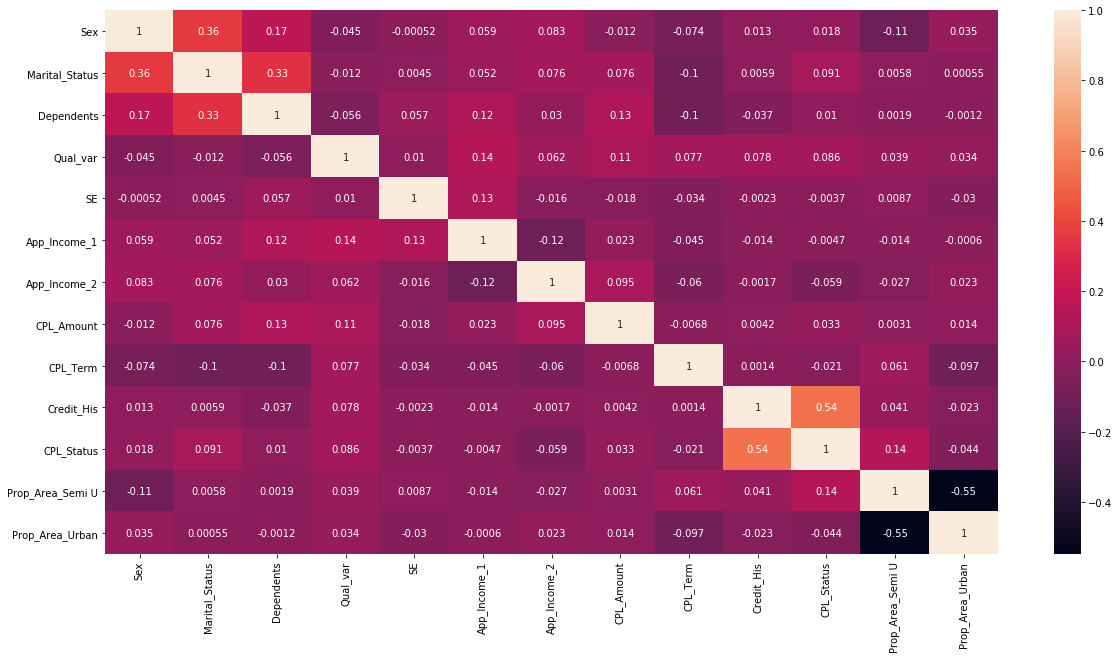

In [20]:
# plot the heat map to check if there is any high correlation among attributes
plt.figure(figsize=(20,10))
sns.heatmap(loan.corr(),annot=True)

In [21]:
# dividing the train data into X and Y
X_train=loan.drop('CPL_Status',axis=1)
Y_train=loan['CPL_Status']

# Test data preparation

In [22]:
# load test data set and follow all the above steps to process this data
loan1=pd.read_excel("Project - 4 - Test Data.xlsx")
loan1=loan1.drop(['Loanapp_ID','first_name','last_name','email','address','INT_ID','Prev_ID','AGT_ID'],axis=1)
loan1.head()

,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area
0,M,Y,0,Grad,N,6864.0,0.0,132.0,360.0,1.0,Urban
1,M,Y,1,Grad,N,3691.2,1800.0,151.2,360.0,1.0,Urban
2,M,Y,2,Grad,N,6000.0,2160.0,249.6,360.0,1.0,Urban
3,M,Y,2,Grad,N,2808.0,3055.2,120.0,360.0,NaN,Urban
4,M,N,0,Non Grad,N,3931.2,0.0,93.6,360.0,1.0,Urban


In [23]:
loan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             356 non-null    object 
 1   Marital_Status  367 non-null    object 
 2   Dependents      357 non-null    object 
 3   Qual_var        367 non-null    object 
 4   SE              344 non-null    object 
 5   App_Income_1    367 non-null    float64
 6   App_Income_2    367 non-null    float64
 7   CPL_Amount      367 non-null    float64
 8   CPL_Term        361 non-null    float64
 9   Credit_His      338 non-null    float64
 10  Prop_Area       367 non-null    object 
dtypes: float64(5), object(6)
memory usage: 31.7+ KB


In [24]:
loan1.isnull().values.sum()

79

In [25]:
loan1['Sex'].value_counts()

M    286
F     70
Name: Sex, dtype: int64

In [26]:
loan1['Marital_Status'].value_counts()

Y    233
N    134
Name: Marital_Status, dtype: int64

In [27]:
loan1['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [28]:
loan1['Qual_var'].value_counts()

Grad        283
Non Grad     84
Name: Qual_var, dtype: int64

In [29]:
loan1['SE'].value_counts()

N    307
Y     37
Name: SE, dtype: int64

In [30]:
loan1['Prop_Area'].value_counts()

Urban     140
Semi U    116
Rural     111
Name: Prop_Area, dtype: int64

In [31]:
loan1.isnull().sum()

Sex               11
Marital_Status     0
Dependents        10
Qual_var           0
SE                23
App_Income_1       0
App_Income_2       0
CPL_Amount         0
CPL_Term           6
Credit_His        29
Prop_Area          0
dtype: int64

In [32]:
loan1.isnull().sum().sum()

79

In [33]:
loan1.CPL_Term.fillna(loan1['CPL_Term'].mean(),inplace=True)
loan1.Credit_His.fillna(loan1['Credit_His'].mean(),inplace=True)
loan1.isnull().sum()

Sex               11
Marital_Status     0
Dependents        10
Qual_var           0
SE                23
App_Income_1       0
App_Income_2       0
CPL_Amount         0
CPL_Term           0
Credit_His         0
Prop_Area          0
dtype: int64

In [34]:
loan1['Sex']=loan1.Sex.map({'M':1,'F':0})
loan1['Marital_Status']=loan1.Marital_Status.map({'Y':1,'N':0})
loan1['Dependents']=loan1.Dependents.map({0:0,1:1,2:2,'3+':3})
loan1['SE']=loan1.SE.map({'Y':1,'N':0})
loan1['Qual_var']=loan1.Qual_var.map({'Grad':1,'Non Grad':0})

prop_area1=pd.get_dummies(loan1['Prop_Area'],prefix='Prop_Area',drop_first=True)
loan1=pd.concat([loan1,prop_area1],axis=1)
loan1=loan1.drop('Prop_Area',axis=1)

In [35]:
loan1.head()

,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area_Semi U,Prop_Area_Urban
0,1.0,1,0.0,1,0.0,6864.0,0.0,132.0,360.0,1.000000,0,1
1,1.0,1,1.0,1,0.0,3691.2,1800.0,151.2,360.0,1.000000,0,1
2,1.0,1,2.0,1,0.0,6000.0,2160.0,249.6,360.0,1.000000,0,1
3,1.0,1,2.0,1,0.0,2808.0,3055.2,120.0,360.0,0.825444,0,1
4,1.0,0,0.0,0,0.0,3931.2,0.0,93.6,360.0,1.000000,0,1


In [36]:
mode1=loan1.mode(axis=0)
print(mode1)
loan1['Sex'].fillna(mode1.iloc[0,0],inplace=True)
loan1['Dependents'].fillna(mode1.iloc[0,2],inplace=True)
loan1['SE'].fillna(mode1.iloc[0,4],inplace=True)

   Sex  Marital_Status  Dependents  Qual_var   SE  App_Income_1  App_Income_2  \
0  1.0             1.0         0.0       1.0  0.0        4200.0           0.0   
1  NaN             NaN         NaN       NaN  NaN        6000.0           NaN   

   CPL_Amount  CPL_Term  Credit_His  Prop_Area_Semi U  Prop_Area_Urban  
0       180.0     360.0         1.0               0.0              0.0  
1         NaN       NaN         NaN               NaN              NaN  


In [37]:
loan.isnull().sum().sum()

0

In [38]:
X_test=loan1

# Model Building

Lets now build models using different ml algorithms and choose the best model among them

# Logistic Regression

In [39]:
# import all the required libraries
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import scale

In [40]:
# scale train and test data using scale funtion
X_train=scale(X_train)
X_test=scale(X_test)

In [41]:
# declare logisticregression object
LR=LogisticRegression(max_iter=200)
# declare a kfold object for k fold cross validation
kf=KFold(n_splits=5,shuffle=True,random_state=10)
# apply cross validation on the train set to get the accuracy
accuracy=cross_val_score(LR,X_train,Y_train,cv=kf,scoring='accuracy')
print('Accuracy=',accuracy)
print('Average accuracy =',accuracy.mean())

Accuracy= [0.79674797 0.82926829 0.87804878 0.7804878  0.7704918 ]
Average accuracy = 0.8110089297614287


In [42]:
# store the accuracy scores in a data frame
Score_Table=pd.DataFrame(columns=['Model name','Accuracy(%)'])
Score_Table.loc[0]=['Logistic Reg',accuracy.mean()*100]

# Support Vector Classifier

In [43]:
# declare a svc object
svc=SVC(C=1)
# calculate accuracy score using cross validation
svc_accuracy=cross_val_score(svc,X_train,Y_train,cv=kf,scoring='accuracy')
# print accuracy scores
print('Accuracy=',svc_accuracy)
print('Average accuracy with C=1 is=',svc_accuracy.mean())

Accuracy= [0.79674797 0.82113821 0.8699187  0.76422764 0.76229508]
Average accuracy with C=1 is= 0.8028655204584834


In [44]:
from sklearn.model_selection import GridSearchCV
# now lets find the best parameter by grid search method
params={"C":[0.1,1,10,100,1000]}
Gridsearch=GridSearchCV(estimator=svc,param_grid=params,scoring='accuracy',cv=kf,verbose=1,return_train_score=True)

In [45]:
# fit the data set 
Gridsearch.fit(X_train,Y_train)
# store the results to results variable
results=pd.DataFrame(Gridsearch.cv_results_)
results

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006988,0.000011,0.001402,4.968031e-04,0.1,{'C': 0.1},0.788618,0.804878,0.804878,0.764228,...,0.776783,0.031475,3,0.798371,0.784114,0.753564,0.792261,0.800813,0.785825,0.017130
1,0.006391,0.000499,0.001794,3.987774e-04,1,{'C': 1},0.796748,0.821138,0.869919,0.764228,...,0.802866,0.040016,1,0.832994,0.818737,0.804481,0.830957,0.831301,0.823694,0.010870
2,0.008769,0.000745,0.001197,3.997584e-04,10,{'C': 10},0.756098,0.756098,0.853659,0.780488,...,0.780088,0.038051,2,0.896130,0.887984,0.867617,0.890020,0.906504,0.889651,0.012763
3,0.014960,0.001407,0.000998,4.489872e-06,100,{'C': 100},0.731707,0.674797,0.731707,0.772358,...,0.723097,0.032368,4,0.951120,0.945010,0.940937,0.932790,0.947154,0.943402,0.006244
4,0.024134,0.002475,0.000998,6.975526e-07,1000,{'C': 1000},0.707317,0.715447,0.731707,0.723577,...,0.716593,0.010009,5,0.971487,0.971487,0.963340,0.965377,0.971545,0.968647,0.003560


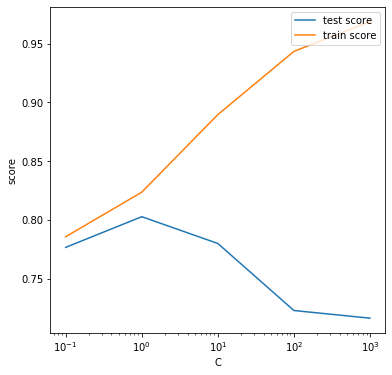

In [46]:
# plot the accuracy vs C by using matplot library
plt.figure(figsize=(6,6))
plt.plot(results['param_C'],results['mean_test_score'])
plt.plot(results['param_C'],results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('score')
plt.legend(['test score','train score'], loc='upper right')
plt.xscale('log')
plt.show()

In [47]:
# now lets tune the parameter more and search for best parameter
params={"C":[0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,2]}
Gridsearch=GridSearchCV(estimator=svc,param_grid=params,scoring='accuracy',cv=kf,verbose=1,return_train_score=True)
Gridsearch.fit(X_train,Y_train)
results=pd.DataFrame(Gridsearch.cv_results_)
results

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.8s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007185,0.000746,0.001699,4.105315e-04,0.5,{'C': 0.5},0.796748,0.829268,0.869919,0.772358,...,0.807757,0.037656,1,0.820774,0.812627,0.798371,0.822811,0.823171,0.815551,0.009399
1,0.006787,0.000399,0.001377,4.767470e-04,0.6,{'C': 0.6},0.796748,0.829268,0.869919,0.772358,...,0.807757,0.037656,1,0.822811,0.814664,0.800407,0.822811,0.825203,0.817179,0.009115
2,0.008179,0.001477,0.001396,4.868210e-04,0.7,{'C': 0.7},0.796748,0.829268,0.869919,0.772358,...,0.807757,0.037656,1,0.824847,0.814664,0.800407,0.824847,0.825203,0.817994,0.009657
3,0.009566,0.001016,0.001609,4.995374e-04,0.8,{'C': 0.8},0.796748,0.829268,0.869919,0.772358,...,0.806118,0.039381,4,0.824847,0.816701,0.800407,0.824847,0.825203,0.818401,0.009550
4,0.007780,0.000748,0.001594,4.870111e-04,0.9,{'C': 0.9},0.796748,0.821138,0.869919,0.764228,...,0.802866,0.040016,8,0.828921,0.818737,0.800407,0.824847,0.829268,0.820436,0.010710
5,0.007187,0.000975,0.001397,4.896101e-04,1,{'C': 1},0.796748,0.821138,0.869919,0.764228,...,0.802866,0.040016,8,0.832994,0.818737,0.804481,0.830957,0.831301,0.823694,0.010870
6,0.006782,0.000746,0.000997,8.714517e-07,1.1,{'C': 1.1},0.796748,0.821138,0.878049,0.764228,...,0.804492,0.042777,5,0.835031,0.818737,0.806517,0.830957,0.835366,0.825322,0.011170
7,0.006782,0.000746,0.001197,3.990415e-04,1.2,{'C': 1.2},0.796748,0.821138,0.878049,0.764228,...,0.804492,0.042777,5,0.837067,0.818737,0.810591,0.837067,0.835366,0.827766,0.011021
8,0.006781,0.000747,0.001397,4.892795e-04,1.3,{'C': 1.3},0.796748,0.821138,0.878049,0.764228,...,0.804492,0.042777,5,0.837067,0.824847,0.810591,0.837067,0.839431,0.829801,0.010880
9,0.007580,0.001197,0.001197,3.997803e-04,1.4,{'C': 1.4},0.796748,0.821138,0.869919,0.764228,...,0.799587,0.043707,11,0.839104,0.824847,0.818737,0.839104,0.843496,0.833058,0.009535


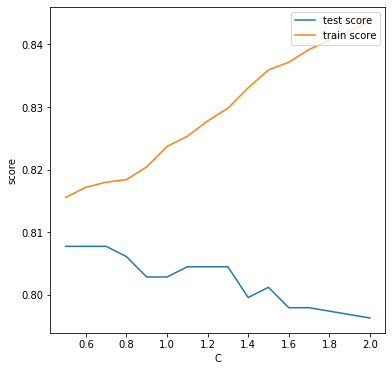

In [48]:
plt.figure(figsize=(6,6))
plt.plot(results['param_C'],results['mean_test_score'])
plt.plot(results['param_C'],results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('score')
plt.legend(['test score','train score'], loc='upper right')
plt.show()

In [49]:
# see which parameter value gives best result
results[results.mean_test_score==results.mean_test_score.max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007185,0.000746,0.001699,0.000411,0.5,{'C': 0.5},0.796748,0.829268,0.869919,0.772358,...,0.807757,0.037656,1,0.820774,0.812627,0.798371,0.822811,0.823171,0.815551,0.009399
1,0.006787,0.000399,0.001377,0.000477,0.6,{'C': 0.6},0.796748,0.829268,0.869919,0.772358,...,0.807757,0.037656,1,0.822811,0.814664,0.800407,0.822811,0.825203,0.817179,0.009115
2,0.008179,0.001477,0.001396,0.000487,0.7,{'C': 0.7},0.796748,0.829268,0.869919,0.772358,...,0.807757,0.037656,1,0.824847,0.814664,0.800407,0.824847,0.825203,0.817994,0.009657


In [50]:
print('best score for SVC=',Gridsearch.best_score_)
print('best parameter for SVC=',Gridsearch.best_params_)

best score for SVC= 0.8077568972411037
best parameter for SVC= {'C': 0.5}


In [51]:
# store and print the best parameter 
best_c=Gridsearch.best_params_
model=SVC(best_c['C'])
svc_accuracy1=cross_val_score(model,X_train,Y_train,cv=kf,scoring='accuracy')
print('Accuracy for SVC=',svc_accuracy1)
print('Mean Accuracy for SVC=',svc_accuracy1.mean())

Accuracy for SVC= [0.79674797 0.82926829 0.8699187  0.77235772 0.7704918 ]
Mean Accuracy for SVC= 0.8077568972411037


In [52]:
# store the accuracy score to the dataframe
Score_Table.loc[1]=['SVC for C=0.5',svc_accuracy1.mean()*100]

# K-Nearest Neighbor

In [53]:
# now lets build the model using knn 
from sklearn import neighbors
# apply grid search cv to find the best value of number of neigbors
N={"n_neighbors":[1,2,5,10,20,30,40,50,60]}
clf=neighbors.KNeighborsClassifier()
Gridsearch=GridSearchCV(estimator=clf,param_grid=N,scoring='accuracy',cv=kf,verbose=1,return_train_score=True)

In [54]:
Gridsearch.fit(X_train,Y_train)
clf_results=pd.DataFrame(Gridsearch.cv_results_)
clf_results

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.1s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001999,0.000631,0.004978,0.000630,1,{'n_neighbors': 1},0.699187,0.691057,0.756098,0.707317,...,0.714994,0.022853,8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.001596,0.000490,0.005185,0.000399,2,{'n_neighbors': 2},0.666667,0.642276,0.707317,0.650407,...,0.666120,0.022440,9,0.881874,0.879837,0.853360,0.863544,0.873984,0.870520,0.010685
2,0.001396,0.000489,0.005779,0.000984,5,{'n_neighbors': 5},0.756098,0.804878,0.829268,0.756098,...,0.781727,0.029958,5,0.830957,0.810591,0.802444,0.810591,0.831301,0.817177,0.011775
3,0.001584,0.000477,0.005794,0.000735,10,{'n_neighbors': 10},0.731707,0.804878,0.837398,0.780488,...,0.784993,0.035247,3,0.818737,0.814664,0.798371,0.810591,0.815041,0.811481,0.007045
4,0.001199,0.000397,0.005775,0.000393,20,{'n_neighbors': 20},0.796748,0.821138,0.853659,0.772358,...,0.802879,0.031401,1,0.818737,0.804481,0.788187,0.812627,0.815041,0.807815,0.010872
5,0.001815,0.000392,0.005976,0.000652,30,{'n_neighbors': 30},0.788618,0.829268,0.821138,0.772358,...,0.796375,0.024504,2,0.810591,0.798371,0.782077,0.810591,0.815041,0.803334,0.011990
6,0.001603,0.000495,0.006182,0.000398,40,{'n_neighbors': 40},0.756098,0.813008,0.813008,0.772358,...,0.783353,0.024763,4,0.796334,0.782077,0.761711,0.796334,0.804878,0.788267,0.015163
7,0.001596,0.000488,0.006179,0.000402,50,{'n_neighbors': 50},0.756098,0.804878,0.780488,0.756098,...,0.771971,0.018724,6,0.788187,0.771894,0.743381,0.790224,0.782520,0.775241,0.017154
8,0.001796,0.000398,0.006386,0.000481,60,{'n_neighbors': 60},0.747967,0.821138,0.764228,0.723577,...,0.758923,0.033818,7,0.782077,0.755601,0.729124,0.780041,0.774390,0.764247,0.019893


In [55]:
best_score=Gridsearch.best_score_
best_n=Gridsearch.best_params_
print('best test score=',best_score)
print('best number of neighbours=',best_n)

best test score= 0.8028788484606159
best number of neighbours= {'n_neighbors': 20}


In [56]:
N={"n_neighbors":[14,15,16,17,18,19,20,21,22,23,24,25]}
clf=neighbors.KNeighborsClassifier()
Gridsearch=GridSearchCV(estimator=clf,param_grid=N,scoring='accuracy',cv=kf,verbose=1,return_train_score=True)
Gridsearch.fit(X_train,Y_train)
clf_results=pd.DataFrame(Gridsearch.cv_results_)

best_score=Gridsearch.best_score_
best_n=Gridsearch.best_params_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


In [57]:
print('best accuracy score=',best_score)
print('best number of neighbours=',best_n)

best accuracy score= 0.8045048647207784
best number of neighbours= {'n_neighbors': 22}


In [58]:
Score_Table.loc[2]=['KNN for neighbors =22',best_score*100]

# Decision Tree

lets again prepare the data that to be applied for the decision tree algorithm. Here i have applied label encoder to encode the catagorical variables

In [59]:
loan=pd.read_excel("Project - 4 - Train Data.xlsx")
loan=loan.drop(['Loanapp_ID','first_name','last_name','email','address','INT_ID','Prev_ID','AGT_ID'],axis=1)
loan.head()

,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status
0,M,N,0,Grad,N,7018.8,0.0,NaN,360.0,1.0,Urban,Y
1,M,Y,1,Grad,N,5499.6,1809.6,153.6,360.0,1.0,Rural,N
2,M,Y,0,Grad,Y,3600.0,0.0,79.2,360.0,1.0,Urban,Y
3,M,Y,0,Non Grad,N,3099.6,2829.6,144.0,360.0,1.0,Urban,Y
4,M,N,0,Grad,N,7200.0,0.0,169.2,360.0,1.0,Urban,Y


In [60]:
# lets fill the missing values for continuos values
loan.CPL_Amount.fillna(loan['CPL_Amount'].mean(),inplace=True)
loan.CPL_Term.fillna(loan['CPL_Term'].mean(),inplace=True)
loan.Credit_His.fillna(loan['Credit_His'].mean(),inplace=True)
loan.isnull().sum()

Sex               13
Marital_Status     3
Dependents        15
Qual_var           0
SE                32
App_Income_1       0
App_Income_2       0
CPL_Amount         0
CPL_Term           0
Credit_His         0
Prop_Area          0
CPL_Status         0
dtype: int64

In [61]:
# temporarily map the catagorical values to numerical values
loan['Sex']=loan.Sex.map({'M':1,'F':0})
loan['Marital_Status']=loan.Marital_Status.map({'Y':1,'N':0})
loan['Dependents']=loan.Dependents.map({0:0,1:1,2:2,'3+':3})
loan['SE']=loan.SE.map({'Y':1,'N':0})
loan['Qual_var']=loan.Qual_var.map({'Grad':1,'Non Grad':0})
loan['Prop_Area']=loan.Prop_Area.map({'Urban':1,'Semi U':2,'Rural':3})
loan['CPL_Status']=loan.CPL_Status.map({'Y':1,'N':0})


In [62]:
# fill the missing values for catagorical values
mode=loan.mode(axis=0)
print(mode)
loan['Sex'].fillna(mode.iloc[0,0],inplace=True)
loan['Marital_Status'].fillna(mode.iloc[0,1],inplace=True)
loan['Dependents'].fillna(mode.iloc[0,2],inplace=True)
loan['SE'].fillna(mode.iloc[0,4],inplace=True)

   Sex  Marital_Status  Dependents  Qual_var   SE  App_Income_1  App_Income_2  \
0  1.0             1.0         0.0         1  0.0        3000.0           0.0   

   CPL_Amount  CPL_Term  Credit_His  Prop_Area  CPL_Status  
0       144.0     360.0         1.0          2           1  


In [63]:
# again map the catagorical values back to previous values
loan['Sex']=loan.Sex.map({1:'M',0:'F'})
loan['Marital_Status']=loan.Marital_Status.map({1:'Y',0:'N'})
loan['Dependents']=loan.Dependents.map({0:'0',1:'1',2:'2',3:'3+'})
loan['SE']=loan.SE.map({1:'Y',0:'N'})
loan['Qual_var']=loan.Qual_var.map({1:'Grad',0:'Non Grad'})
loan['Prop_Area']=loan.Prop_Area.map({1:'Urban',2:'Semi U',3:'Rural'})
loan['CPL_Status']=loan.CPL_Status.map({1:'Y',0:'N'})

In [64]:
# now lets encode the catagorical values into a separate dataframe
from sklearn import preprocessing
df_categorical = loan.select_dtypes(include=['object'])
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()


,Sex,Marital_Status,Dependents,Qual_var,SE,Prop_Area,CPL_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


In [65]:
# concatinate the two dataframe into a single data frame
loan = loan.drop(df_categorical.columns, axis=1)
loan = pd.concat([loan, df_categorical], axis=1)
loan.head()

,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Sex,Marital_Status,Dependents,Qual_var,SE,Prop_Area,CPL_Status
0,7018.8,0.0,175.805882,360.0,1.0,1,0,0,0,0,2,1
1,5499.6,1809.6,153.600000,360.0,1.0,1,1,1,0,0,0,0
2,3600.0,0.0,79.200000,360.0,1.0,1,1,0,0,1,2,1
3,3099.6,2829.6,144.000000,360.0,1.0,1,1,0,1,0,2,1
4,7200.0,0.0,169.200000,360.0,1.0,1,0,0,0,0,2,1


Model building for DT

In [66]:
# devide the data set in X and Y
X_train=loan.drop('CPL_Status',axis=1)
Y_train=loan['CPL_Status']

In [67]:
from sklearn.tree import DecisionTreeClassifier
# tuning maximum depth by grid search method
parameters = {'max_depth': range(1, 10)}

DT = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

DT_clf = GridSearchCV(DT, parameters, 
                    cv=kf, 
                   scoring="accuracy")
DT_clf.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_

In [68]:
results=pd.DataFrame(DT_clf.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002195,0.000416,0.001196,0.000380,1,{'max_depth': 1},0.796748,0.829268,0.869919,0.780488,0.770492,0.809383,0.036241,1
1,0.002194,0.000415,0.000798,0.000399,2,{'max_depth': 2},0.796748,0.821138,0.837398,0.780488,0.762295,0.799613,0.027047,3
2,0.002194,0.000384,0.001001,0.000005,3,{'max_depth': 3},0.796748,0.821138,0.845528,0.764228,0.770492,0.799627,0.030594,2
3,0.002398,0.000508,0.000793,0.000396,4,{'max_depth': 4},0.796748,0.772358,0.829268,0.772358,0.754098,0.784966,0.025970,5
4,0.002800,0.000739,0.000990,0.000014,5,{'max_depth': 5},0.780488,0.796748,0.796748,0.780488,0.770492,0.784993,0.010269,4


In [69]:
# print best values and best scores
print('best maximum depth=',DT_clf.best_params_)
print('best accuracy=',DT_clf.best_score_)

best maximum depth= {'max_depth': 1}
best accuracy= 0.8093829135012662


In [70]:
# tuning minimum samples leaf
parameters = {'min_samples_leaf': range(1, 100, 2)}

DT = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

DT_clf1 = GridSearchCV(DT, parameters, 
                    cv=kf, 
                   scoring="accuracy")
DT_clf1.fit(X_train, Y_train)
print('best min_samples_leaf=',DT_clf1.best_params_)
print('best accuracy=',DT_clf1.best_score_)

best min_samples_leaf= {'min_samples_leaf': 33}
best accuracy= 0.8093829135012662


In [71]:
# tuning minimum samples split
parameters = {'min_samples_split': range(2, 100, 2)}
DT = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

DT_clf2 = GridSearchCV(DT, parameters, 
                    cv=kf, 
                   scoring="accuracy")
DT_clf2.fit(X_train, Y_train)
print('best min_samples_split=',DT_clf2.best_params_)
print('best accuracy=',DT_clf2.best_score_)

best min_samples_split= {'min_samples_split': 70}
best accuracy= 0.7833933093429295


In [72]:
# now lets tune all the parameters 
param = {
    'max_depth': range(1, 10),
    'min_samples_leaf': range(1, 100, 10),
    'min_samples_split': range(2, 102, 10),
    'criterion': ["entropy", "gini"]
}

DT = DecisionTreeClassifier()

DT_clf3 = GridSearchCV(estimator=DT, param_grid=param, 
                    cv=kf, 
                   scoring="accuracy",verbose = 1)
DT_clf3.fit(X_train, Y_train)


Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9000 out of 9000 | elapsed:   27.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param

In [73]:
# print the best scores and best values
print('best parameters=',DT_clf3.best_params_)
print('best accuracy=',DT_clf3.best_score_)

best parameters= {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
best accuracy= 0.8093829135012662


In [74]:
# store the accuracy into the data frame
Score_Table.loc[3]=['DT (max depth=1, min_samples_leaf=1, min_samples_split=2)',(DT_clf3.best_score_)*100]

In [75]:
# now lets annalyze the models
Score_Table

,Model name,Accuracy(%)
0,Logistic Reg,81.100893
1,SVC for C=0.5,80.775690
2,KNN for neighbors =22,80.450486
3,"DT (max depth=1, min_samples_leaf=1, min_sampl...",80.938291


So the best model for this data is logistic regression with gives an accuracy of 81%

Now lets build the final model using logistic regression and predict for test data

In [76]:
# Do all the data processing steps that were done before
loan=pd.read_excel("Project - 4 - Train Data.xlsx")
loan=loan.drop(['Loanapp_ID','first_name','last_name','email','address','INT_ID','Prev_ID','AGT_ID'],axis=1)
loan.CPL_Amount.fillna(loan['CPL_Amount'].mean(),inplace=True)
loan.CPL_Term.fillna(loan['CPL_Term'].mean(),inplace=True)
loan.Credit_His.fillna(loan['Credit_His'].mean(),inplace=True)
loan.isnull().sum()
loan['Sex']=loan.Sex.map({'M':1,'F':0})
loan['Marital_Status']=loan.Marital_Status.map({'Y':1,'N':0})
loan['Dependents']=loan.Dependents.map({0:0,1:1,2:2,'3+':3})
loan['SE']=loan.SE.map({'Y':1,'N':0})
loan['Qual_var']=loan.Qual_var.map({'Grad':1,'Non Grad':0})
loan['CPL_Status']=loan.CPL_Status.map({'Y':1,'N':0})
prop_area=pd.get_dummies(loan['Prop_Area'],prefix='Prop_Area',drop_first=True)
loan=pd.concat([loan,prop_area],axis=1)
loan=loan.drop('Prop_Area',axis=1)
mode=loan.mode(axis=0)
loan['Sex'].fillna(mode.iloc[0,0],inplace=True)
loan['Marital_Status'].fillna(mode.iloc[0,1],inplace=True)
loan['Dependents'].fillna(mode.iloc[0,2],inplace=True)
loan['SE'].fillna(mode.iloc[0,4],inplace=True)

In [77]:
# divide the data into X and Y
X_train=loan.drop('CPL_Status',axis=1)
Y_train=loan['CPL_Status']


In [78]:
# scale data by using scale function
X_train=scale(X_train)
X_test=scale(X_test)

In [79]:
# declare the logistic regression object
LR=LogisticRegression(max_iter=200)
# fit the train data 
LR.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
# predict the CPL amount for the test data 
Y_pred=LR.predict(X_test)

In [81]:
# Convert the predicted data into dataframe
Y_pred=pd.DataFrame(Y_pred)

In [82]:
Y=pd.DataFrame(columns=['Predicted CPL Status'])
# map 1 to Y and 0 to N
Y=Y_pred.loc[:,0].map(lambda x:'Y' if x==1 else 'N')

In [83]:
# export the predicted data into an excel sheet 
Y.to_excel("Predicted CPL Status.xlsx")

End                                                                                                                                  
Thank you,